In [447]:
# импортируем необходимые бибилиотеки 
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

# Загрузим необходимые датасеты 

In [448]:
sales_of_company_x = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
robberies_in_boston = pd.read_csv('monthly-boston-armed-robberies-j.csv')
airlines_passengers = pd.read_csv('international-airline-passengers.csv')
mean_monthly_temp = pd.read_csv('mean-monthly-air-temperature-deg.csv')
dowjones_closing = pd.read_csv('weekly-closings-of-the-dowjones-.csv')
female_births = pd.read_csv('daily-total-female-births-in-cal.csv')
carsales_quebec = pd.read_csv('monthly-car-sales-in-quebec-1960.csv')

In [449]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"],
    "Monthly car sales in quebec 1960": carsales_quebec["Count"]
}

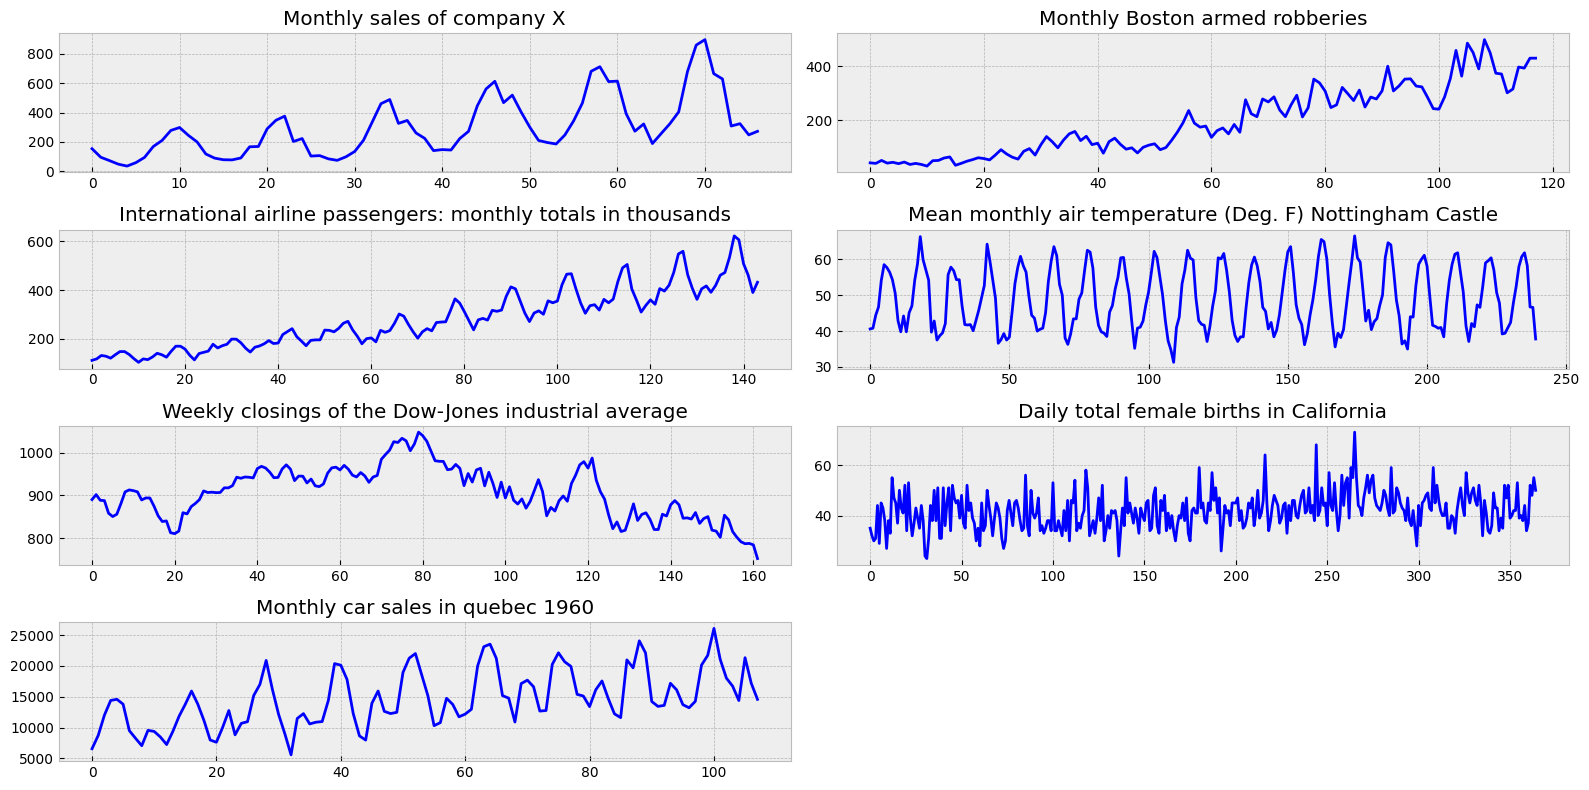

In [450]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (4, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Гляда на данные графики можем предположить, что данные mean_monthly_temp и female_births отвечают критерию о стационарности. Проверим это с помощью теста Дики-Фуллера.

# Проведем тест Дики-Фуллера на непреобразованных данных 

In [451]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [452]:
def tsplot(y, lags=None, figsize=(10, 5), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


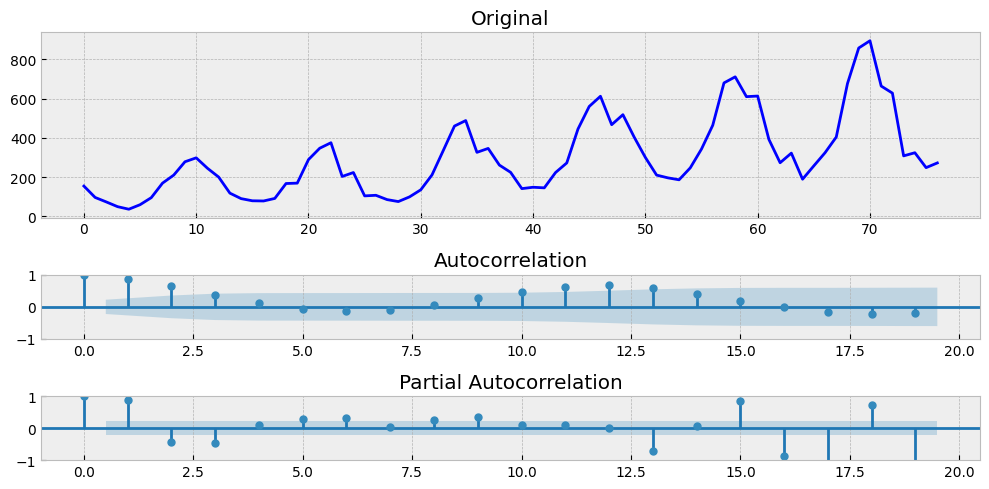

In [453]:
tsplot(sales_of_company_x.Count)

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


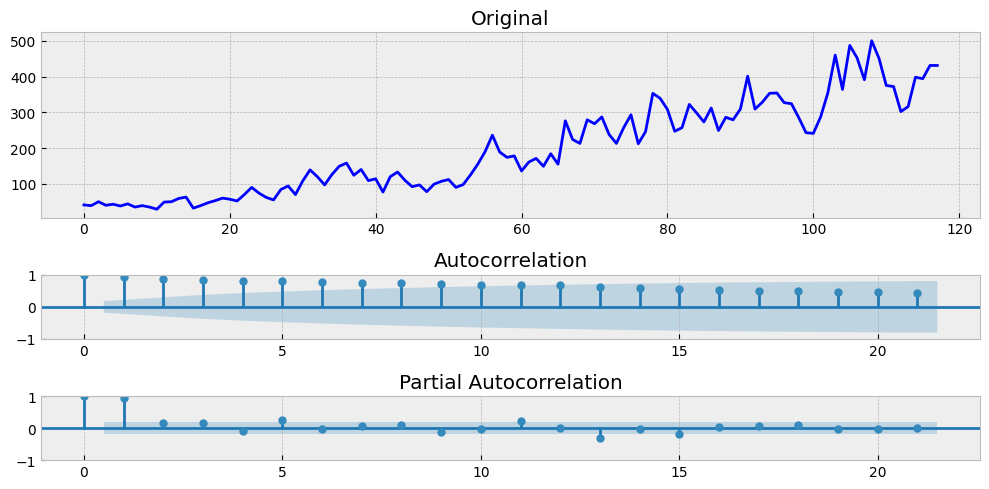

In [454]:
tsplot(robberies_in_boston.Count)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


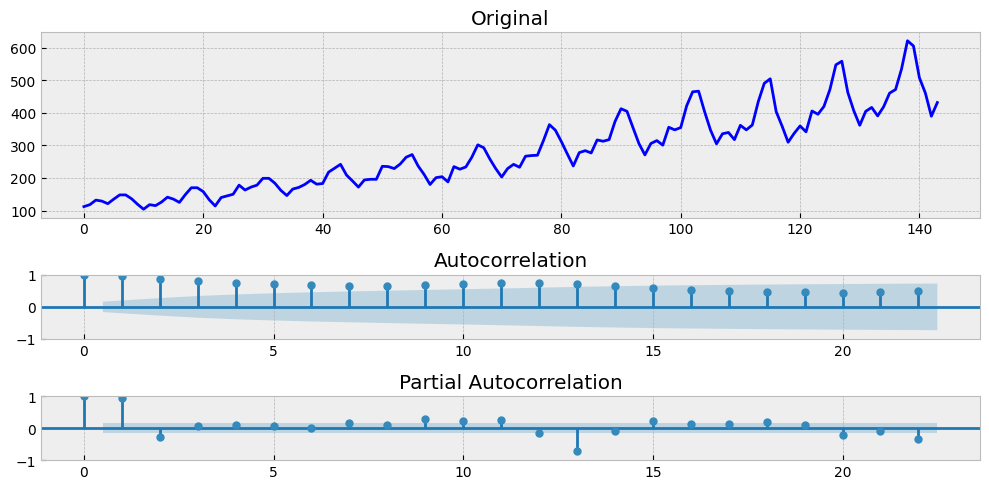

In [455]:
tsplot(airlines_passengers.Count)

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


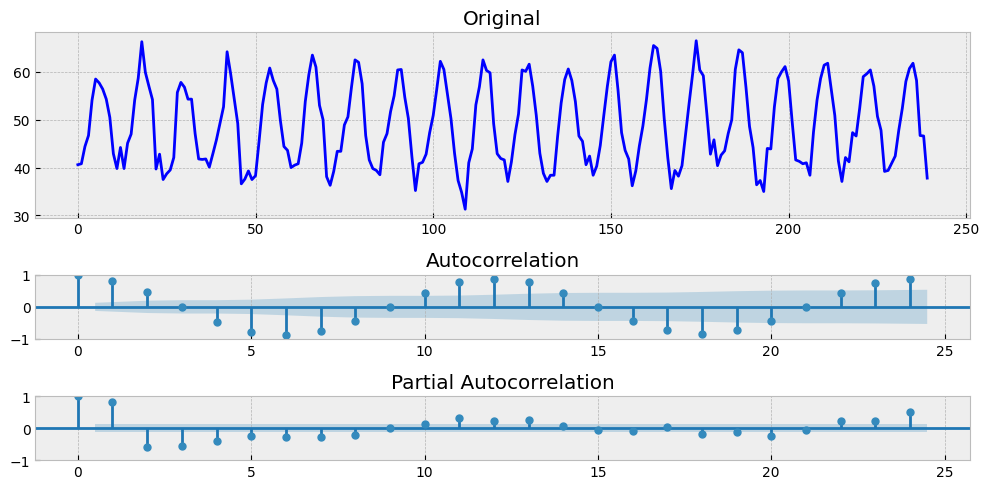

In [456]:
tsplot(mean_monthly_temp.Deg)

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


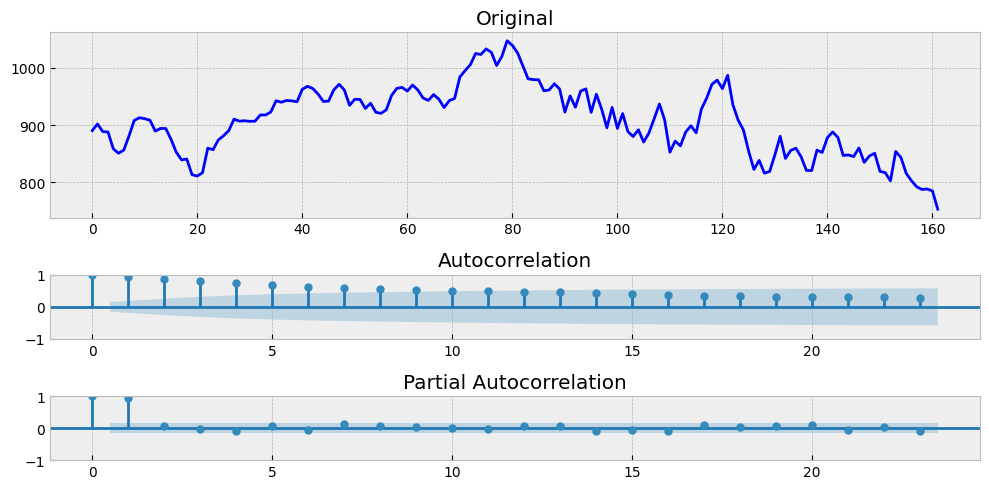

In [457]:
tsplot(dowjones_closing.Close)

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


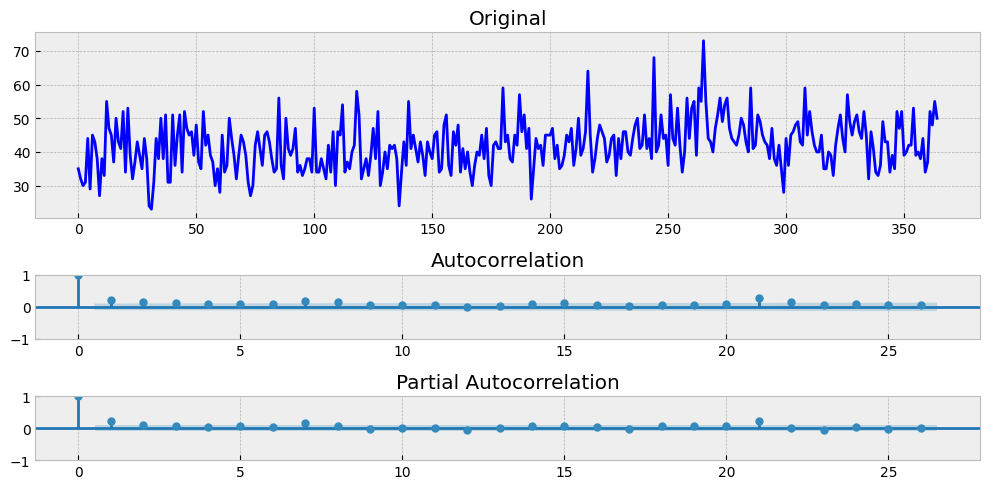

In [458]:
tsplot(female_births.Count)

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


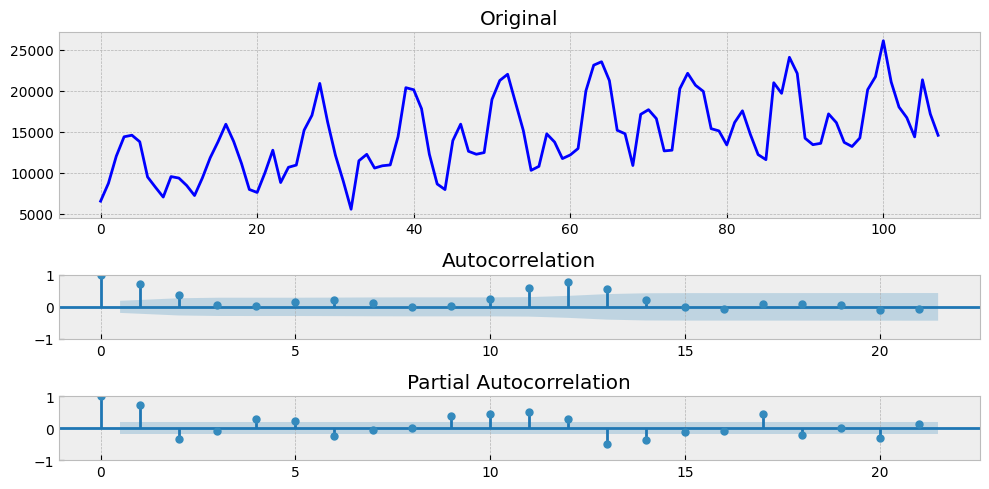

In [459]:
tsplot(carsales_quebec.Count)

По результатам данного теста видим, что данные в следующих датасетах отвечают критерию о стационарности:
- mean_monthly_temp
- female_births

# Уберем изменение дисперсии при помощи преобразования Бокса-Кокса данных с p-value превышающим 0.05.

In [460]:
series_sales_of_company_x = boxcox(all_series["Monthly sales of company X"], 0)
series_robberies_in_boston = boxcox(all_series["Monthly Boston armed robberies"], 0)
series_airlines_passengers = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)
series_dowjones_closing = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)
series_carsales_quebec = boxcox(all_series["Monthly car sales in quebec 1960"], 0)

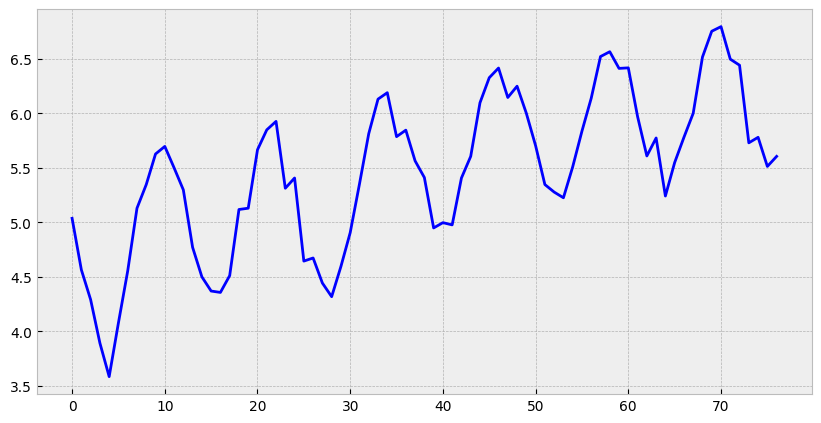

In [461]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 5))
        plt.plot(series_sales_of_company_x, color='blue')

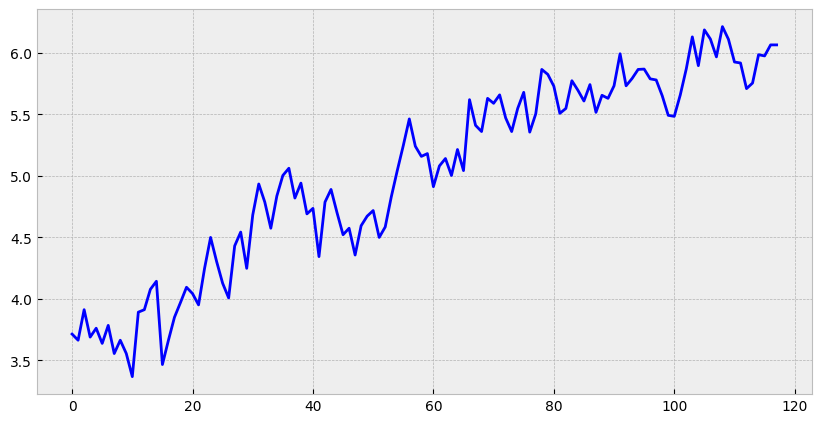

In [462]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 5))
        plt.plot(series_robberies_in_boston, color='blue')

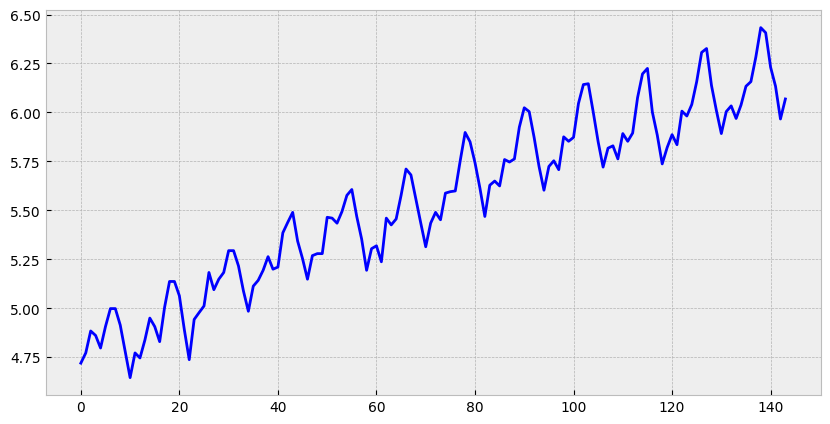

In [463]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 5))
        plt.plot(series_airlines_passengers, color='blue')

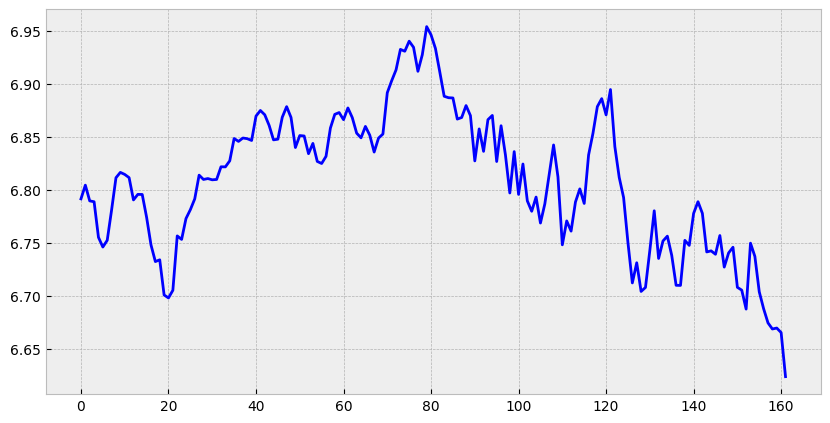

In [464]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 5))
        plt.plot(series_dowjones_closing, color='blue')

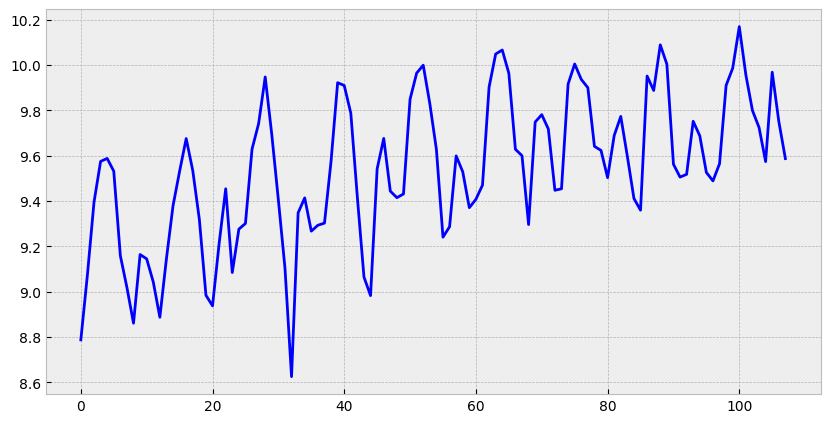

In [465]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 5))
        plt.plot(series_carsales_quebec, color='blue')

# Дифференцируем данные - это позволит нам убрать тренд 

In [466]:
series_sales_of_company_x = np.diff(series_sales_of_company_x, 1)
series_robberies_in_boston = np.diff(series_robberies_in_boston, 1)
series_airlines_passengers = np.diff(series_airlines_passengers, 1)
series_dowjones_closing = np.diff(series_dowjones_closing, 1)
series_carsales_quebec = np.diff(series_carsales_quebec, 1)

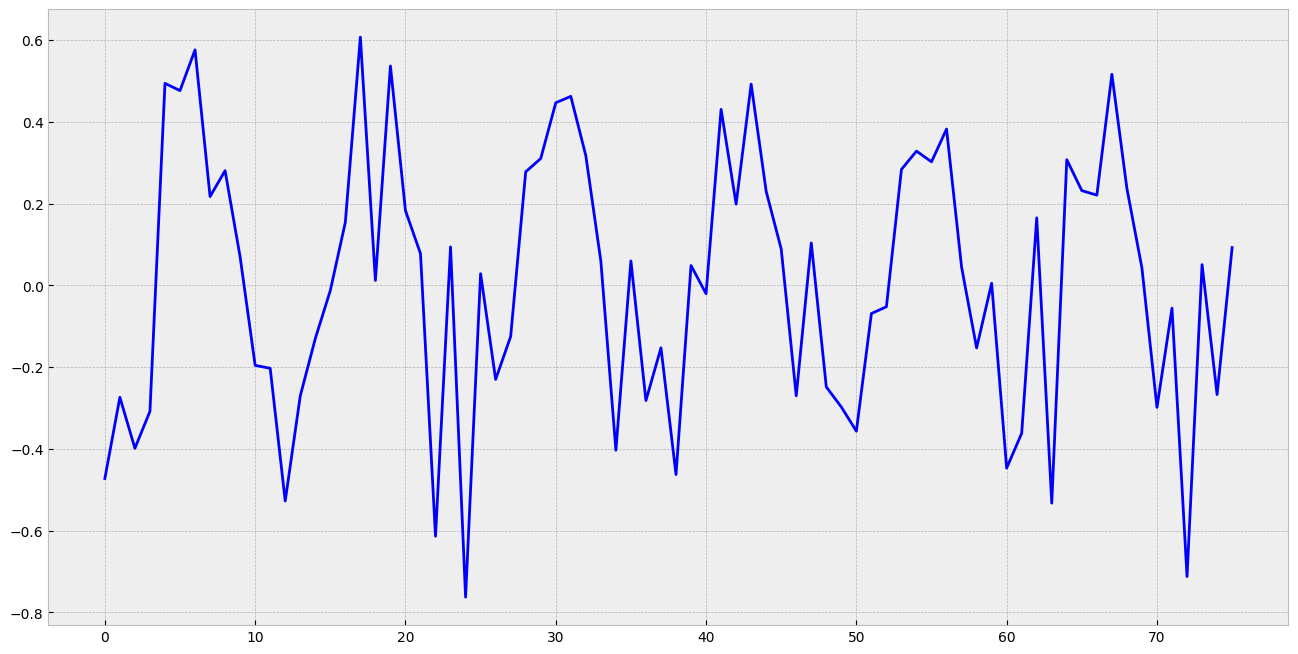

In [467]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_sales_of_company_x, color='blue')

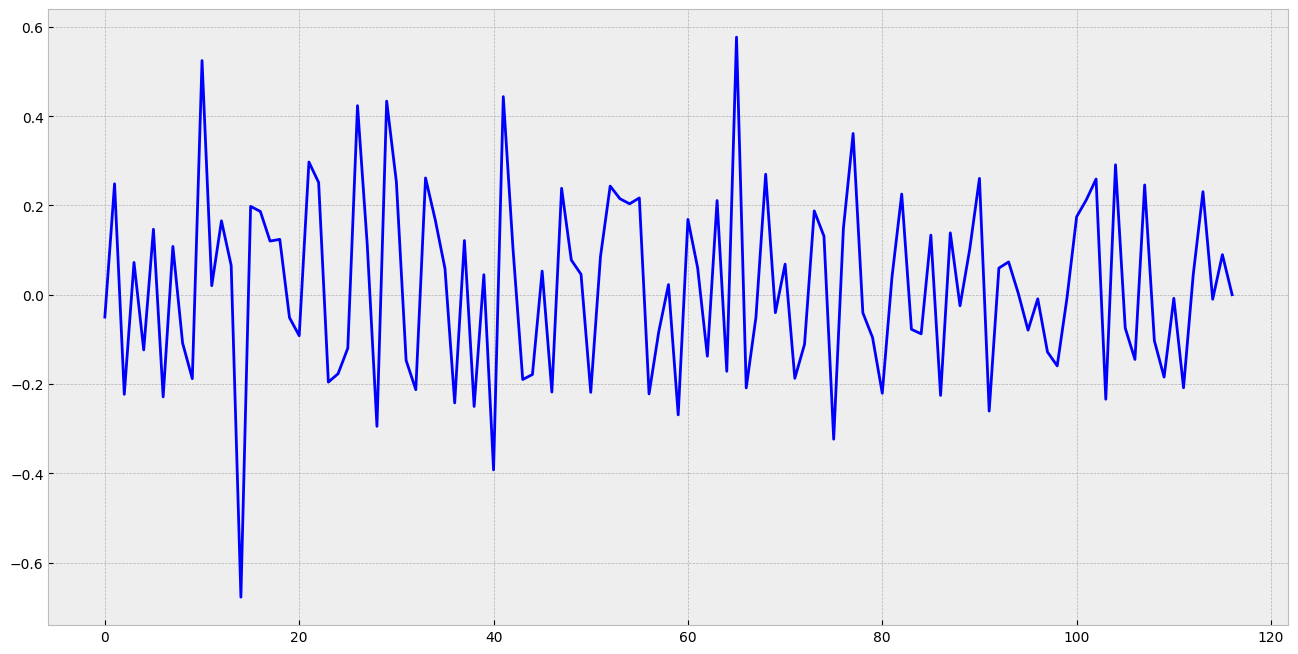

In [468]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_robberies_in_boston, color='blue')

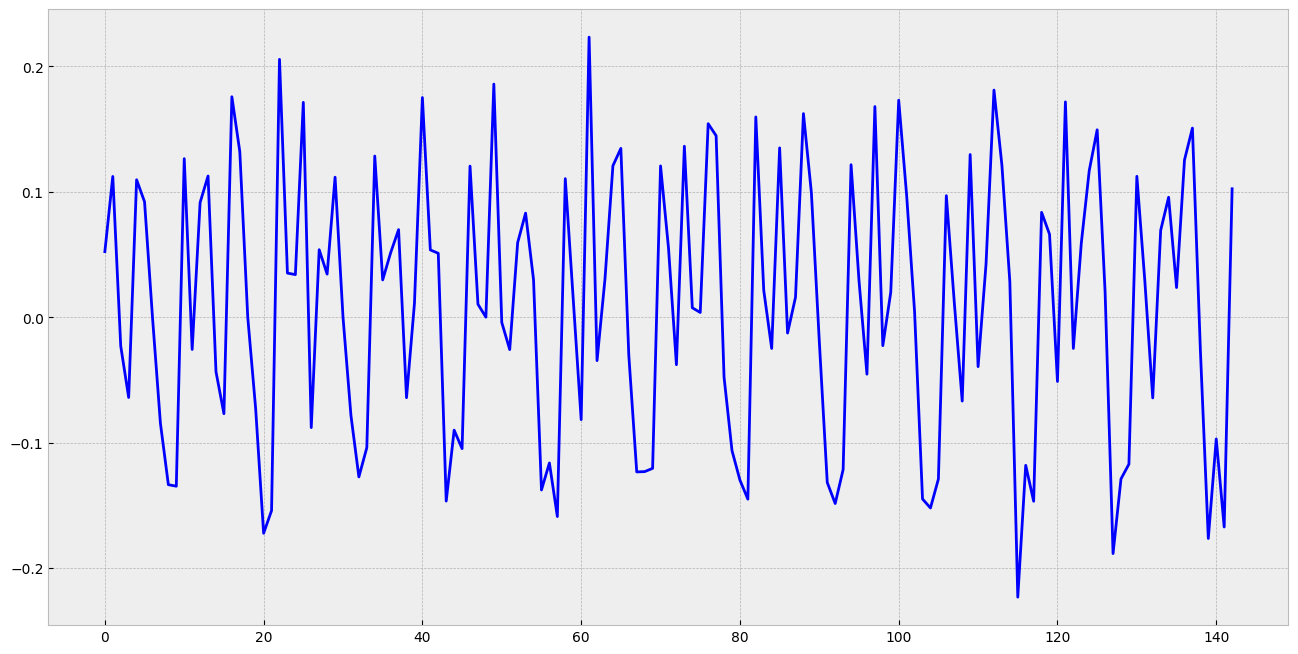

In [469]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_airlines_passengers, color='blue')

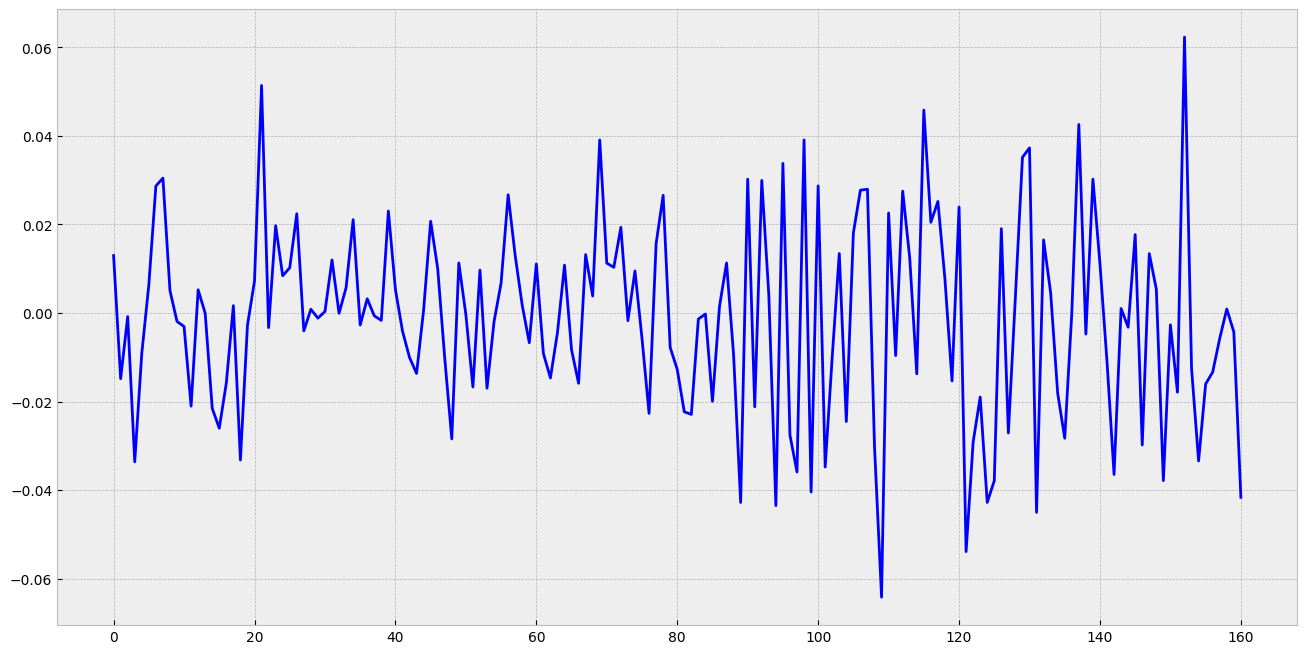

In [470]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_dowjones_closing, color='blue')

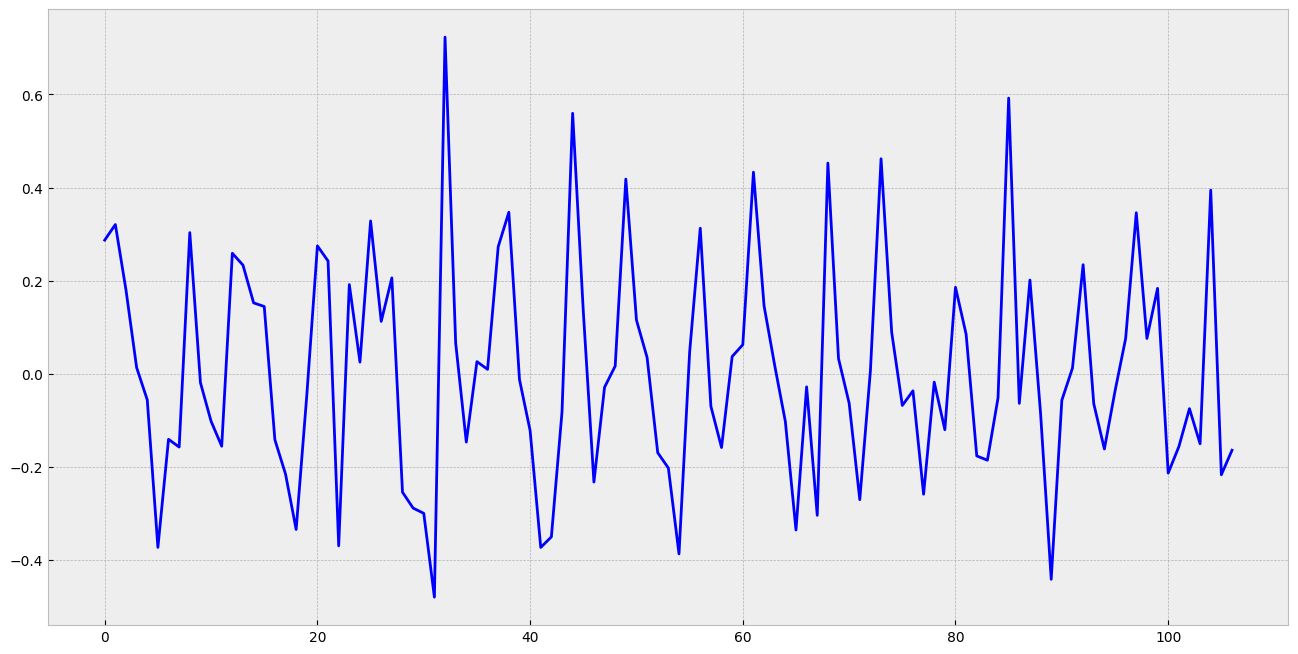

In [471]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_carsales_quebec, color='blue')

# Проведем тест Дики-Фуллера повторно

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


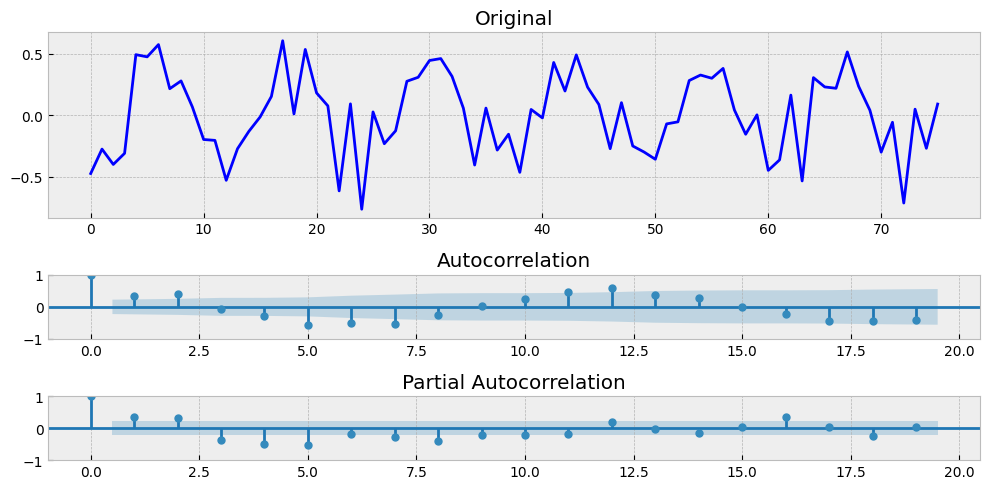

In [472]:
tsplot(series_sales_of_company_x)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


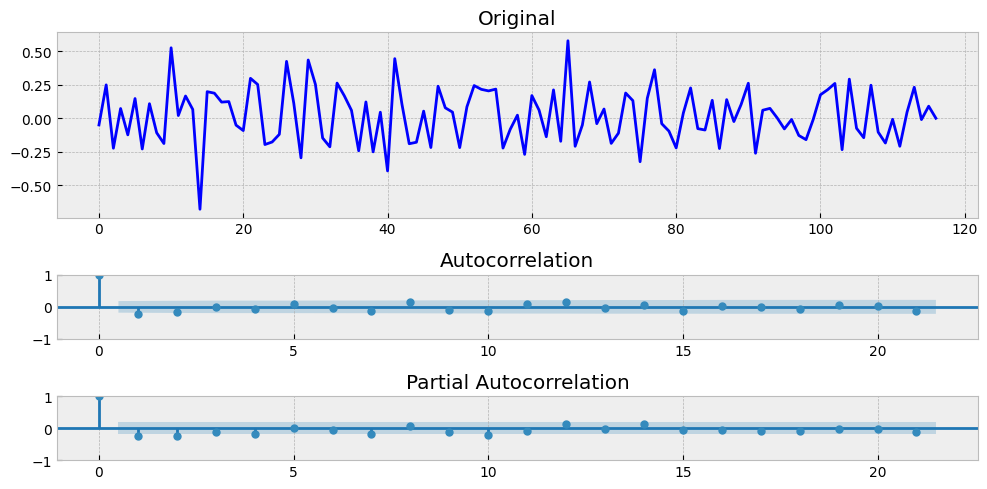

In [473]:
tsplot(series_robberies_in_boston)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


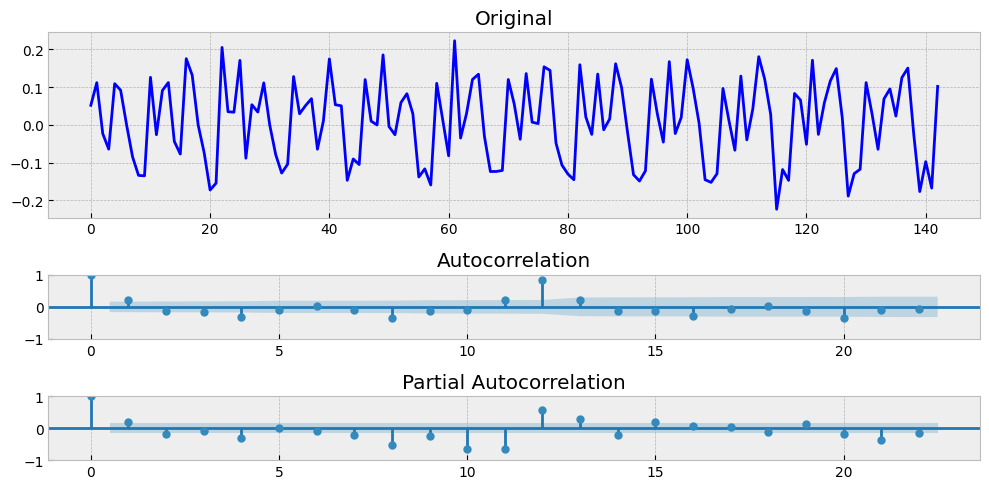

In [474]:
tsplot(series_airlines_passengers)

Видим, что тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда в series_airlines_passengers. Уберем сезонность из данных.

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


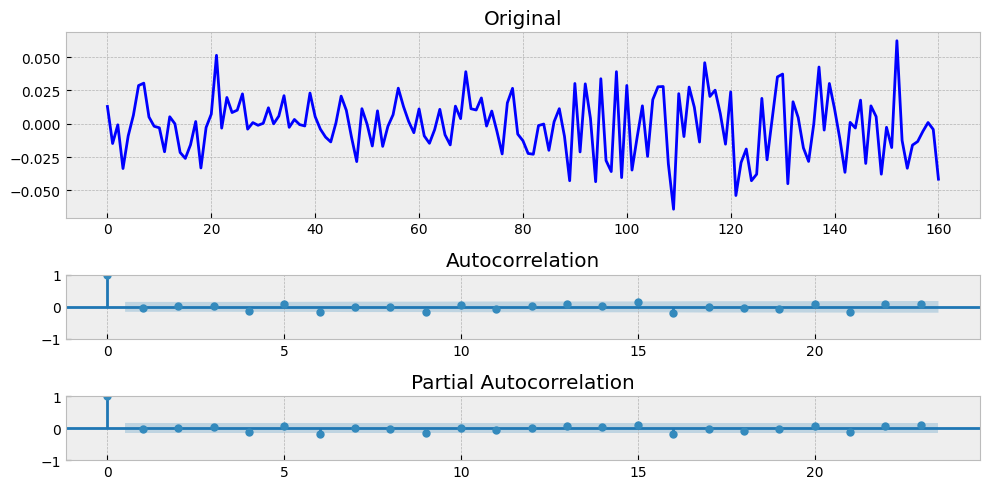

In [475]:
tsplot(series_dowjones_closing)

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


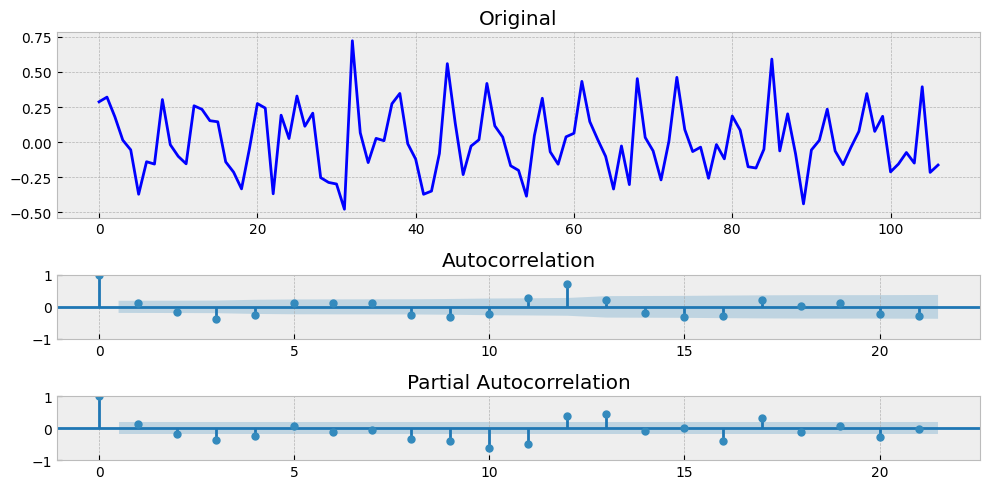

In [476]:
tsplot(series_carsales_quebec)

# Уберем сезонность из:
- series_airlines_passengers
- series_carsales_quebec

In [477]:
series_airlines_passengers = series_airlines_passengers[12:] - series_airlines_passengers[:-12]
series_carsales_quebec = series_carsales_quebec[12:] - series_carsales_quebec[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


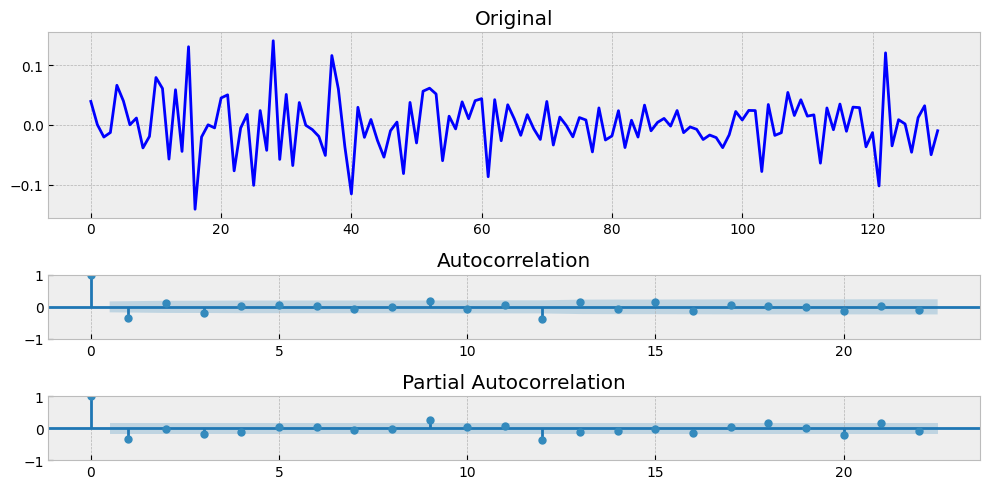

In [478]:
tsplot(series_airlines_passengers)

Results of Dickey-Fuller Test:
Test Statistic                 -3.516067
p-value                         0.007584
#Lags Used                     11.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


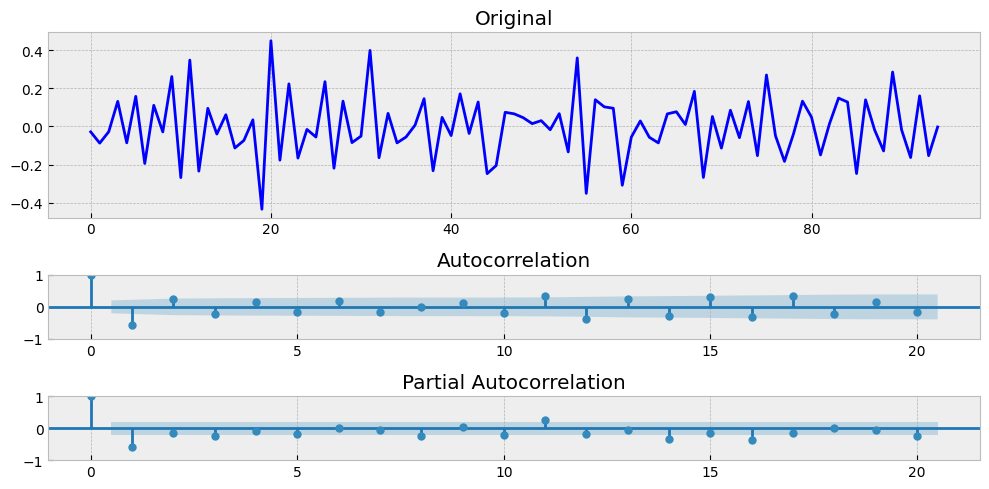

In [479]:
tsplot(series_carsales_quebec)

Все рассмотренные временные ряды после преобразования имеют стационарный вид. 